This notebook provides a simple example of using the API to get the annotations for a dataset and inspect some basic properties about the molecular formula that were annotated.

In [1]:
# External imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib_venn import venn2

In [2]:
# Install from metaspace python-client https://github.com/metaspace2020/metaspace/tree/master/metaspace/python-client
from metaspace.sm_annotation_utils import SMInstance
from metaspace import sm_annotation_utils

In [3]:
# Get annotations for a dataset (by dataset name)
ds1_name = "Brain01_Bregma1-42_01"
fdr = 0.1
sm = SMInstance()
df = pd.DataFrame(sm.dataset(name=ds1_name).annotations(fdr=fdr), columns=['mf', 'adduct'])
print("This dataset has {} annotations at FDR {}%".format(df.shape[0], fdr*100))
df.head()

This dataset has 54 annotations at FDR 10.0%


,mf,adduct
0,C40H80NO8P,+Na
1,C37H71O8P,+K
2,C40H80NO8P,+H
3,C41H82NO8P,+H
4,C41H83N2O6P,+Na


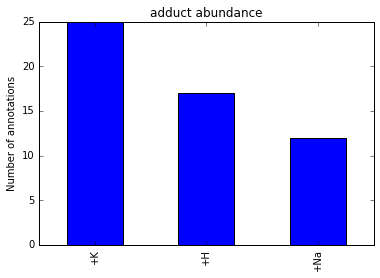

In [4]:
# Show some simple stats on the annotations
ax = df['adduct'].value_counts().plot(kind='bar', title='adduct abundance')
ax.set_ylabel('Number of annotations')
plt.show()

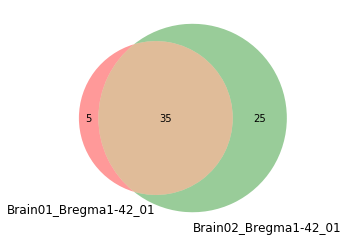

In [5]:
# Compare annotations between two datasets
ds2_name = "Brain02_Bregma1-42_01"
plt.figure()
venn2([set([a[0] for a in sm.dataset(name=ds1_name).annotations(fdr=fdr)]),
       set([a[0] for a in sm.dataset(name=ds2_name).annotations(fdr=fdr)])
      ], 
      set_labels=[ds1_name, ds2_name])
plt.show()